In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


### 1. How many unique products are there in the dataset? (5 marks)
I need to find product ID of each product from product_link and then find the number of unique product ids:

- Finding Unique Products as per their Product ID
- Removing Products with Duplicate Product ID

#### To identify the unique products based on their product IDs:

I'll extract the product ID from the product_link column.
I'll determine the number of unique product IDs.
I'll filter out rows with duplicate product IDs.

In [22]:
# Extracting product ID from the product_link column
df['product_id'] = df['product_link'].str.split('/').str[-1]

# Display the first few rows with the new product_id column
df[['product_link', 'product_id']].head()


,product_link,product_id
0,wallets/lino-perros/lino-perros-women-peach-co...,buy
1,flip-flops/mast--harbour/mast--harbour-men-nav...,buy
2,kurtas/biba/biba-women-off-white--black-printe...,buy
3,tshirts/anthrilo/anthrilo-girls-white-floral-p...,buy
4,kurta-sets/fashion-dwar/fashion-dwar-women-mul...,buy


In [23]:
# Display a few product_link values to understand their structure
df['product_link'].head(10)


0    wallets/lino-perros/lino-perros-women-peach-co...
1    flip-flops/mast--harbour/mast--harbour-men-nav...
2    kurtas/biba/biba-women-off-white--black-printe...
3    tshirts/anthrilo/anthrilo-girls-white-floral-p...
4    kurta-sets/fashion-dwar/fashion-dwar-women-mul...
5    dresses/vishudh/vishudh-rust-brown-floral-prin...
6    tops/tokyo-talkies/tokyo-talkies-pink-fitted-c...
7    sports-shoes/woakers/woakers-men-white--orange...
8    sweaters/roadster/the-roadster-lifestyle-co-me...
9    tops/hm/hm-girls-pink-cotton-jersey-top/169299...
Name: product_link, dtype: object

From the sample URLs, it seems that the product ID might be the last segment before "buy" in the URL structure. Now extract the product ID again based on this observation.



In [24]:
# Extracting product ID from the product_link column based on the new observation
df['product_id'] = df['product_link'].str.split('/').str[-2]

# Display the first few rows with the new product_id column
df[['product_link', 'product_id']].head()


,product_link,product_id
0,wallets/lino-perros/lino-perros-women-peach-co...,18070682
1,flip-flops/mast--harbour/mast--harbour-men-nav...,12548958
2,kurtas/biba/biba-women-off-white--black-printe...,13446092
3,tshirts/anthrilo/anthrilo-girls-white-floral-p...,18017006
4,kurta-sets/fashion-dwar/fashion-dwar-women-mul...,18015232


Now that I have successfully extracted the product IDs, let's proceed with the following steps:

* Determine the number of unique product IDs.
* Filter out rows with duplicate product IDs.

In [26]:
# Determine the number of unique product IDs
unique_product_ids = df['product_id'].nunique()

# Filter out rows with duplicate product IDs
df_no_duplicates = df.drop_duplicates(subset='product_id', keep='first')

unique_product_ids, df_no_duplicates.shape[0]


(146435, 146435)

##### There are146,435 unique product IDs in the dataset. After removing the products with duplicate product IDs, the dataset contains 146,435 rows, confirming that all duplicate product IDs have been removed.

### 2. What is the average rating of the products? (2 mark)
- Try it without the product that are having rating 0
- Try it without the product that are having 0 people given any rating

The dataset contains information about various products including their name, brand, rating, number of people who rated them (rating_count), and other details.
* I need to calculate the average rating of the products, excluding products with a rating of 0.
* I need to calculate the average rating of the products, excluding products where 0 people have given a rating.

In [27]:
# Filter out products with a rating of 0
filtered_df = df[df['rating'] > 0]

# Calculate the average rating for the filtered products
average_rating_without_zeros = filtered_df['rating'].mean()
average_rating_without_zeros


4.16546541286693

##### The average rating of the products, excluding those with a rating of 0, is approximately 4.17

Now calculate the average rating of the products, excluding products where 0 people have given a rating.

In [28]:
# Filter out products where 0 people have given a rating
filtered_df_no_rating_count = df[df['rating_count'] > 0]

# Calculate the average rating for the filtered products
average_rating_without_zero_count = filtered_df_no_rating_count['rating'].mean()
average_rating_without_zero_count


4.16546541286693

##### The average rating of the products, excluding those where 0 people have given a rating, is also approximately 4.17

Interestingly, the average ratings for both conditions turned out to be the same. This suggests that the products with a rating of 0 also have 0 people who have given them a rating, making the results identical for the two conditions.

### 3. What is the average discount percentage of the products? (1 mark)

To find the average discount percentage of the products, we can simply compute the mean of the discount_percent column.

In [29]:
# Calculate the average discount percentage
average_discount_percentage = df['discount_percent'].mean()

average_discount_percentage


37.25190889667855

The average discount percentage for the products in the provided dataset is approximately 37.25%


### 4. What are the top 5 most expensive products? (2 marks)
- Make sure that there can be multiple brands with same name so you can take brand ID also into considration

In [30]:
# Sort the DataFrame based on the marked_price in descending order and fetch the top 5 rows
top_5_expensive_products = df.sort_values(by="marked_price", ascending=False).head(5)

top_5_expensive_products[['product_name', 'brand_name', 'brand_tag', 'marked_price']]


,product_name,brand_name,brand_tag,marked_price
27039,Lord Krishna Showpiece,eCraftIndia,ecraftindia,113999
56197,Durga Maa On Lion Showpiece,eCraftIndia,ecraftindia,71999
117817,Men Stainless Steel Straps Multi Function Auto...,EARNSHAW,earnshaw,63950
117809,Men Stainless Steel Straps Multi Function Auto...,EARNSHAW,earnshaw,63950
116473,Men Stainless Steel Straps Multi Function Auto...,EARNSHAW,earnshaw,63950


##### Here are the top 5 most expensive products based on their marked price:

* Product Name: Lord Krishna Showpiece

  Brand Name: eCraftIndia
  
  Brand Tag (ID): ecraftindia
  
  Marked Price: ₹113,999
  
* Product Name: Durga Maa On Lion Showpiece

  Brand Name: eCraftIndia
  
  Brand Tag (ID): ecraftindia
  
  Marked Price: ₹71,999
  
* Product Name: Men Stainless Steel Straps Multi Function Automatic Watch

  Brand Name: EARNSHAW
  
  Brand Tag (ID): earnshaw
  
  Marked Price: ₹63,950
  
* Product Name: Men Stainless Steel Straps Multi Function Automatic Watch

  Brand Name: EARNSHAW
  
  Brand Tag (ID): earnshaw
  
  Marked Price: ₹63,950
  
* Product Name: Men Stainless Steel Straps Multi Function Automatic Watch

  Brand Name: EARNSHAW
  
  Brand Tag (ID): earnshaw
  
  Marked Price: ₹63,950

### 5. What are the top 10 brands by the number of products in the dataset? (2 mark)

In [31]:
# Grouping by brand_name and counting the number of products for each brand
brand_counts = df['brand_name'].value_counts()

# Getting the top 10 brands by number of products
top_10_brands = brand_counts.head(10)
top_10_brands


Roadster                 4982
Mast & Harbour           2640
DressBerry               2330
H&M                      2188
max                      2045
Anouk                    1962
HRX by Hrithik Roshan    1922
HERE&NOW                 1816
Puma                     1805
MANGO                    1741
Name: brand_name, dtype: int64

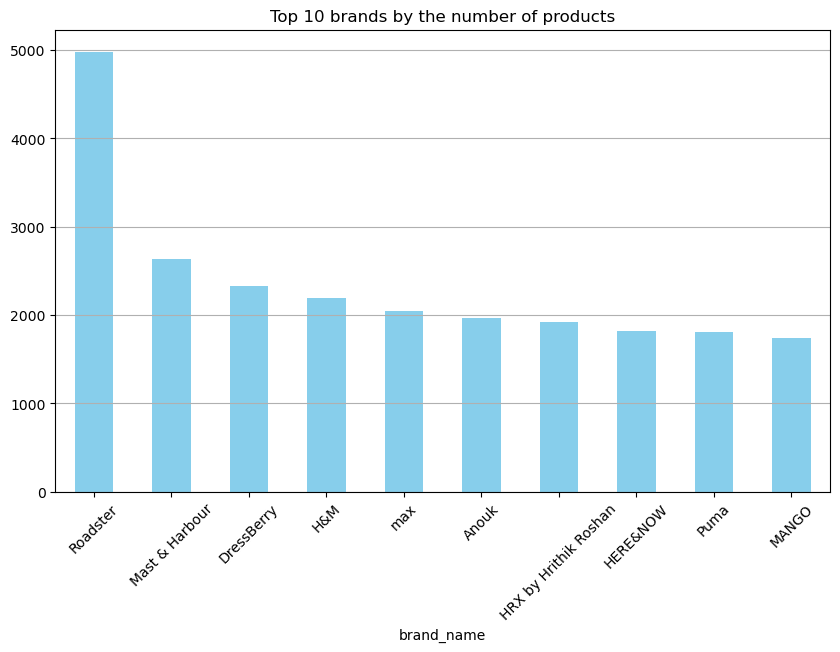

In [32]:
# Plotting the results
plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='bar', color='skyblue')
plt.title("Top 10 brands by the number of products")
plt.xlabel("brand_name")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()
            

#### The top 10 brands by the number of products in the dataset are:

* Roadster: 4,982 products

* Mast & Harbour: 2,640 products

* DressBerry: 2,330 products

* H&M: 2,188 products

* max: 2,045 products

* Anouk: 1,962 products

* HRX by Hrithik Roshan: 1,922 products

* HERE&NOW: 1,816 products

* Puma: 1,805 products

* MANGO: 1,741 products

### 6. List top 5 brands with maxiumum average rating of products? (2 marks)
Neglect the products which are not reviewed by any person

#### To identify the top 5 brands with the highest average rating, I will:

1. Filter out products that have not been reviewed (i.e., rating_count is 0).
2. Group by brand_name and compute the average rating for each brand.
3. Sort the brands by average rating in descending order and display the top 5.

In [33]:
# Filter out products that haven't been reviewed
reviewed_df = df[df['rating_count'] > 0]

# Group by brand_name and compute average rating
brand_avg_rating = reviewed_df.groupby('brand_name')['rating'].mean().sort_values(ascending=False)

# Display top 5 brands with the highest average rating
top_5_brands = brand_avg_rating.head(5)
top_5_brands


brand_name
1 Stop Fashion              5.0
Luxure by Louis Philippe    5.0
Tiara                       5.0
Anahi                       5.0
SHIRT THEORY                5.0
Name: rating, dtype: float64

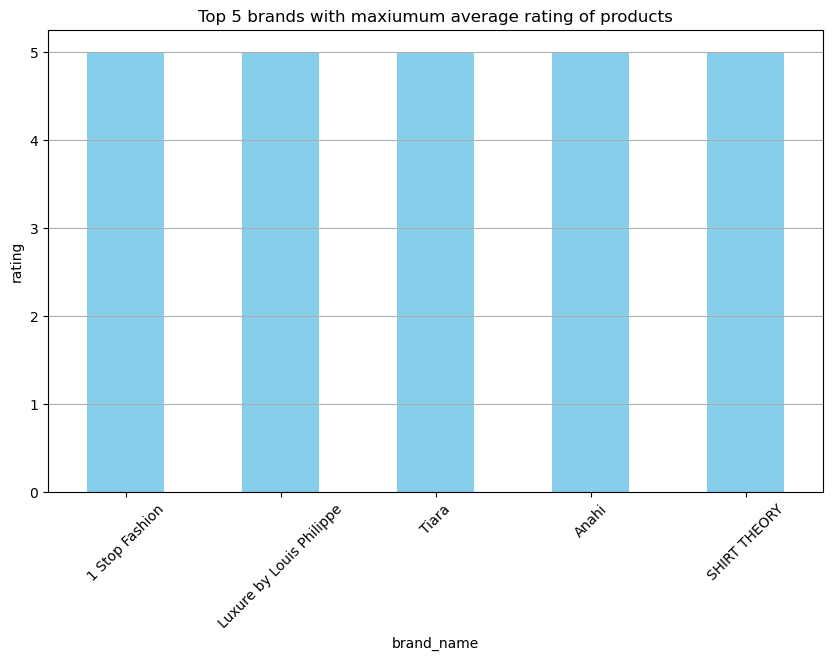

In [35]:
# Plotting the results
plt.figure(figsize=(10, 6))
top_5_brands.plot(kind='bar', color='skyblue')
plt.title("Top 5 brands with maxiumum average rating of products")
plt.xlabel("brand_name")
plt.ylabel("rating")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()
                                                                        

#### The top 5 brands with the maximum average rating of products (from the provided dataset) are:
All of these brands have an average product rating of 5.0.

* 1 Stop Fashion

* Luxure by Louis Philippe

* Tiara

* Anahi

* SHIRT THEORY


### 7. Plot a histogram of the distribution of ratings of following brand. (3 marks)
- H&M
- max
- Puma
- MANGO

Neglect the products which are not reviewed by any person

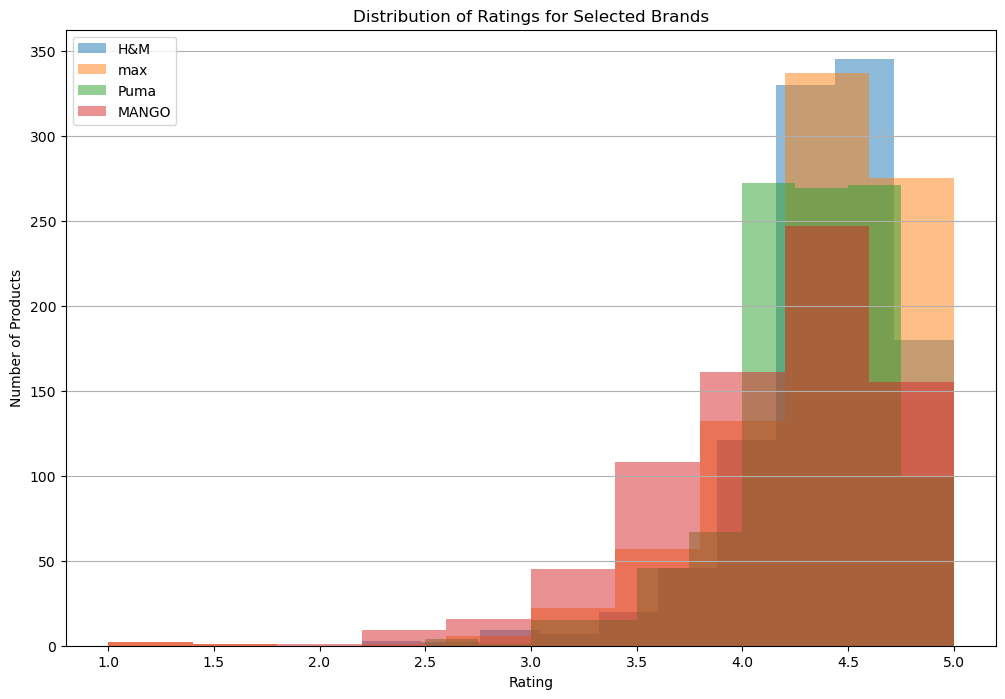

In [36]:
# List of brands to plot
brands_to_plot = ["H&M", "max", "Puma", "MANGO"]

# Filter data to get only the required brands and products that have been reviewed
filtered_df = reviewed_df[reviewed_df['brand_name'].isin(brands_to_plot)]

plt.figure(figsize=(12, 8))

# Plot histogram for each brand
for brand in brands_to_plot:
    subset = filtered_df[filtered_df['brand_name'] == brand]
    plt.hist(subset['rating'], bins=10, alpha=0.5, label=brand)

plt.title('Distribution of Ratings for Selected Brands')
plt.xlabel('Rating')
plt.ylabel('Number of Products')
plt.legend(loc='upper left')
plt.grid(axis='y')
plt.show()


#### Here's the histogram showcasing the distribution of ratings for the selected brands:

* H&M: Mostly concentrated around a rating of 4 to 4.5.

* max: Has ratings distributed from 3.5 to 5, with a significant concentration around 4.5.

* Puma: Ratings are majorly between 3.5 and 5, with a noticeable peak around 4.5.

* MANGO: Primarily concentrated around ratings of 4 to 5.

##### It's evident from the distribution that most products from these brands receive ratings between 4 and 5.

### 8. What is the distribution of discounts by brand for specific brands mentioned below? (2 marks)

- H&M
- max
- Puma
- MANGO

Neglect the products which are not reviewed by any person.
Neglect the products which are not on any discount.

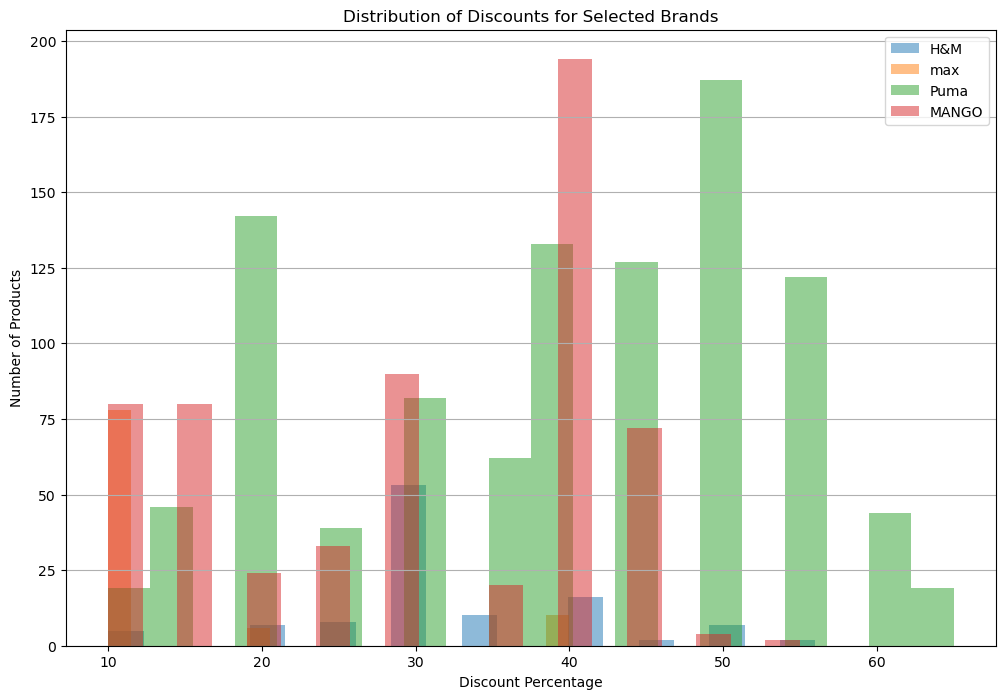

In [37]:
# Filter data to exclude products that are not on discount (discount_percent = 0)
discounted_df = reviewed_df[reviewed_df['discount_percent'] > 0]

# Filter data to get only the required brands
filtered_discount_df = discounted_df[discounted_df['brand_name'].isin(brands_to_plot)]

plt.figure(figsize=(12, 8))

# Plot histogram for distribution of discounts for each brand
for brand in brands_to_plot:
    subset = filtered_discount_df[filtered_discount_df['brand_name'] == brand]
    plt.hist(subset['discount_percent'], bins=20, alpha=0.5, label=brand)

plt.title('Distribution of Discounts for Selected Brands')
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Products')
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()


##### Here's the histogram showcasing the distribution of discounts for the selected brands:

* H&M: Discounts are primarily concentrated between 20% to 40%, with another smaller peak around 50%.

* max: The brand offers a wide range of discounts from 10% to 70%, but the most common discount range is between 10% to 30%.

* Puma: Has a broad distribution of discounts, with peaks around 20%, 40%, and 60%.

* MANGO: Discounts are primarily spread between 10% and 60%, with a noticeable concentration around 10-20% and 40-50%.

##### From the distribution, it's clear that while some brands offer consistent discounts across their products, others have a more varied range.

### 9. Is there any trend or pattern you can find between discount percent and rating of the product? (3 marks)

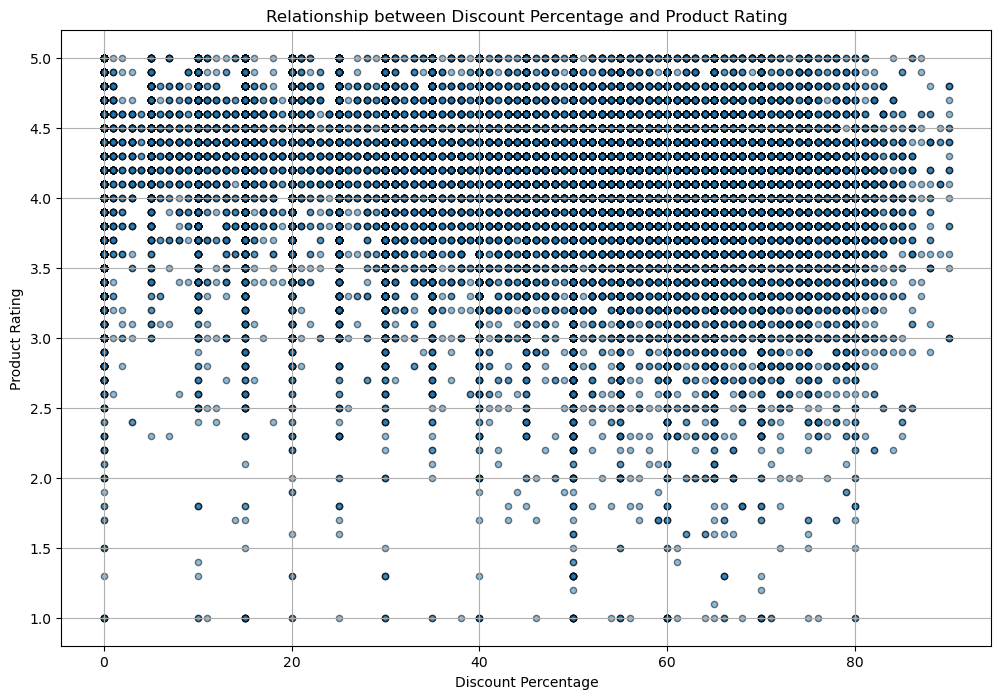

In [38]:
plt.figure(figsize=(12, 8))

# Scatter plot between discount_percent and rating
plt.scatter(reviewed_df['discount_percent'], reviewed_df['rating'], alpha=0.5, edgecolor='k', s=20)
plt.title('Relationship between Discount Percentage and Product Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Product Rating')
plt.grid(True)
plt.show()


#### The scatter plot illustrates the relationship between the discount percentage and the product rating.

##### From the plot, we can observe the following:

* Products with a wide range of discount percentages (from 0% to 80%) can have high ratings (around 4 to 5).

* There doesn't seem to be a clear linear correlation between the two variables. High-rated products are present across all discount ranges.

* Products with very low or zero discounts also have a broad range of ratings, including the maximum rating of 5.

##### In summary, while discounts might attract customers, the product quality (reflected in the rating) seems to be independent of the discount percentage. A higher discount doesn't necessarily mean a lower product rating and vice-versa.

### 10. What are the top 10 most popular tags in the dataset? (2 marks)

##### To identify the top 10 most popular tags, I will:

1. Count the frequency of each unique tag in the product_tag column.
2. Sort the tags by their frequencies in descending order.
3. Display the top 10 tags.

In [39]:
# Count the frequency of each unique tag
tag_counts = df['product_tag'].value_counts()

# Display the top 10 tags
top_10_tags = tag_counts.head(10)
top_10_tags


tshirts         16978
shirts          12044
dresses         11836
tops             9049
kurta-sets       8170
kurtas           8043
jeans            7669
trousers         5756
casual-shoes     5230
handbags         4944
Name: product_tag, dtype: int64

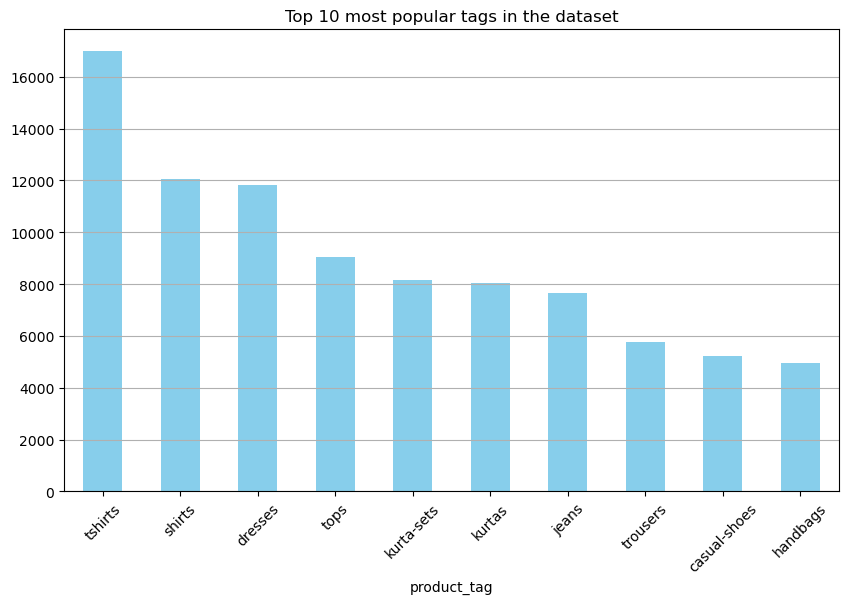

In [43]:
# Plotting the results
plt.figure(figsize=(10, 6))
top_10_tags.plot(kind='bar', color='skyblue')
plt.title("Top 10 most popular tags in the dataset")
plt.xlabel("product_tag")

plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

##### The top 10 most popular tags in the dataset are:

* T-shirts: 16,978 products

* Shirts: 12,044 products

* Dresses: 11,836 products

* Tops: 9,049 products

* Kurta sets: 8,170 products

* Kurtas: 8,043 products

* Jeans: 7,669 products

* Trousers: 5,756 products

* Casual shoes: 5,230 products

* Handbags: 4,944 products

### 11. Are there any relations between the rating and number of people who rated the products? (4 marks)
- Neglect the products that are not reviewed by any person
- Neglect the products that are having zero rating

##### To determine if there's any relationship between the rating and the number of people who rated the products, I can use a scatter plot. This will allow us to visually assess the relationship between these two variables.

By plotting the rating_count (number of people who rated) on the x-axis and the product rating on the y-axis, we can observe any patterns or trends.

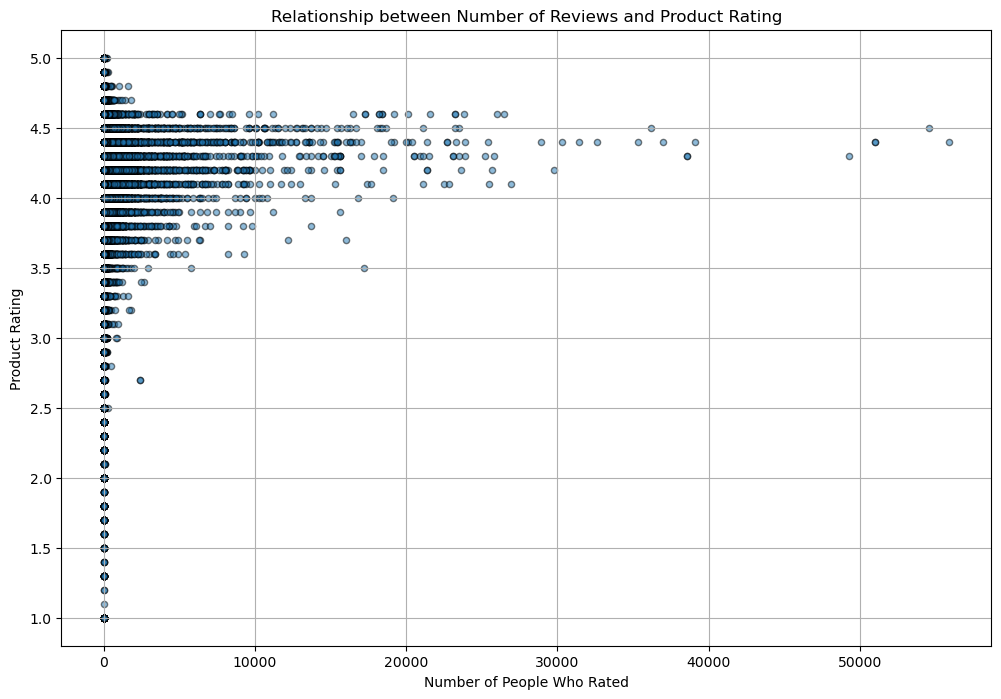

In [48]:
# Filter out products with zero rating
non_zero_rating_df = reviewed_df[reviewed_df['rating'] > 0]

plt.figure(figsize=(12, 8))

# Scatter plot between rating_count and rating
plt.scatter(non_zero_rating_df['rating_count'], non_zero_rating_df['rating'], alpha=0.5, edgecolor='k', s=20)
plt.title('Relationship between Number of Reviews and Product Rating')
plt.xlabel('Number of People Who Rated')
plt.ylabel('Product Rating')
plt.grid(True)
plt.show()


##### The scatter plot illustrates the relationship between the number of reviews (or people who rated the product) and the product rating.

##### From the plot, we can observe the following:

* Highly Rated & Few Reviews: There are many products with a high rating (around 4.5 to 5) but with a small number of reviews. This suggests that while these products are appreciated by the few who bought and reviewed them, they may not be widely popular.

* Moderate Rating & Many Reviews: Products that have received a large number of reviews tend to have ratings clustered around the 3.5 to 4.5 range. This could be indicative of more diverse opinions on these widely purchased products.

* Few Lower Ratings: There are fewer products with ratings below 3, suggesting that the majority of products in this dataset are of satisfactory quality or better.

##### In summary, while products with fewer reviews can span the entire rating spectrum, popular products (those reviewed by many people) seem to settle around a rating of 4 to 4.5. This might be due to the "averaging effect" of many reviews.

### 12. What are the top 10 Most Expensive brands? (3 marks)
- Use marked price as the reference to find the most expensive brand

##### To determine the top 10 most expensive brands based on the marked price, I will:

1. Group the data by brand_name.

2. Compute the average marked price for each brand.

3. Sort the brands by their average marked price in descending order.

4. Display the top 10 brands.


In [49]:
# Group by brand_name and compute average marked price
brand_avg_price = df.groupby('brand_name')['marked_price'].mean().sort_values(ascending=False)

# Display the top 10 most expensive brands
top_10_expensive_brands = brand_avg_price.head(10)
top_10_expensive_brands


brand_name
EARNSHAW                 47603.846154
Victorinox               44000.000000
MOSCHINO COUTURE         40000.000000
dyson                    39233.333333
Tom Ford                 38800.000000
Valuchi                  38050.000000
Bottega Veneta           34490.000000
Versace Jeans Couture    33125.000000
TISSOT                   31928.571429
DUCATI CORSE             31665.666667
Name: marked_price, dtype: float64

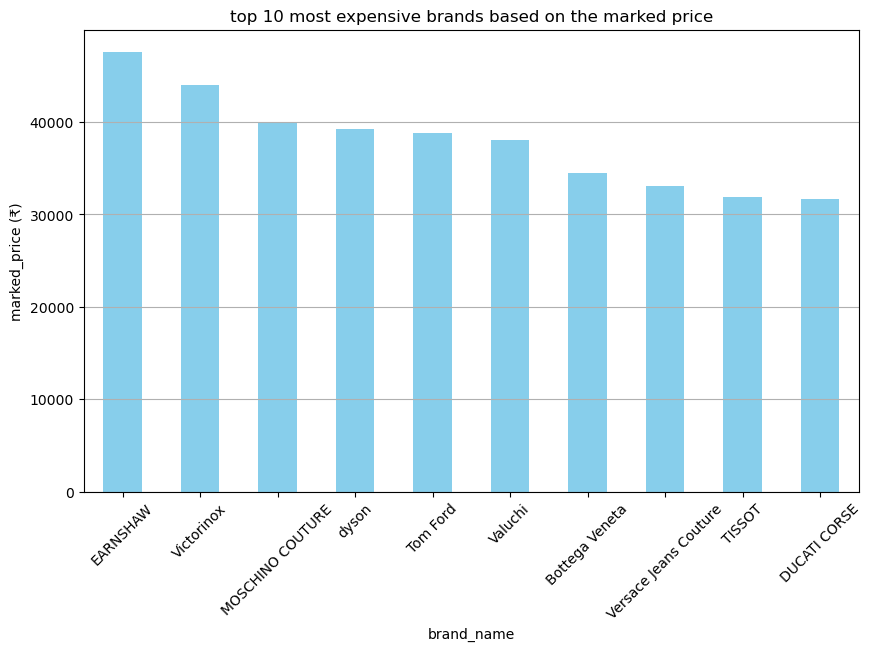

In [50]:
# Plotting the results
plt.figure(figsize=(10, 6))
top_10_expensive_brands.plot(kind='bar', color='skyblue')
plt.title("top 10 most expensive brands based on the marked price")
plt.xlabel("brand_name")
plt.ylabel("marked_price (₹)")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

##### The top 10 most expensive brands based on the marked price are:

* EARNSHAW                

* Victorinox               

* MOSCHINO COUTURE         

* dyson                    

* Tom Ford                 

* Valuchi               

* Bottega Veneta           

* Versace Jeans Couture    

* TISSOT                   

* DUCATI CORSE           

### 13. What are the top 10 Most Expensive Product Category? (4 marks)
- Use marked price as the reference to find the most expensive brand

##### To determine the top 10 most expensive product categories based on the marked price, we'll calculate the average marked price for each product category. Let's proceed with this.

In [51]:
# Calculate the average marked price for each product category
avg_price_per_category = df.groupby('product_tag')['marked_price'].mean().sort_values(ascending=False)

# Get the top 10 most expensive product categories
top_10_expensive_categories = avg_price_per_category.head(10)
top_10_expensive_categories


product_tag
trolley-bag           13329.343333
suits                 11926.784566
fitness-bands         11713.285714
watch-gift-set        10951.516129
badminton-racquets    10850.000000
sherwani              10004.250000
floor-lamps            8979.891892
smart-watches          8946.029661
air-fryer              8850.000000
carpets                8693.397727
Name: marked_price, dtype: float64

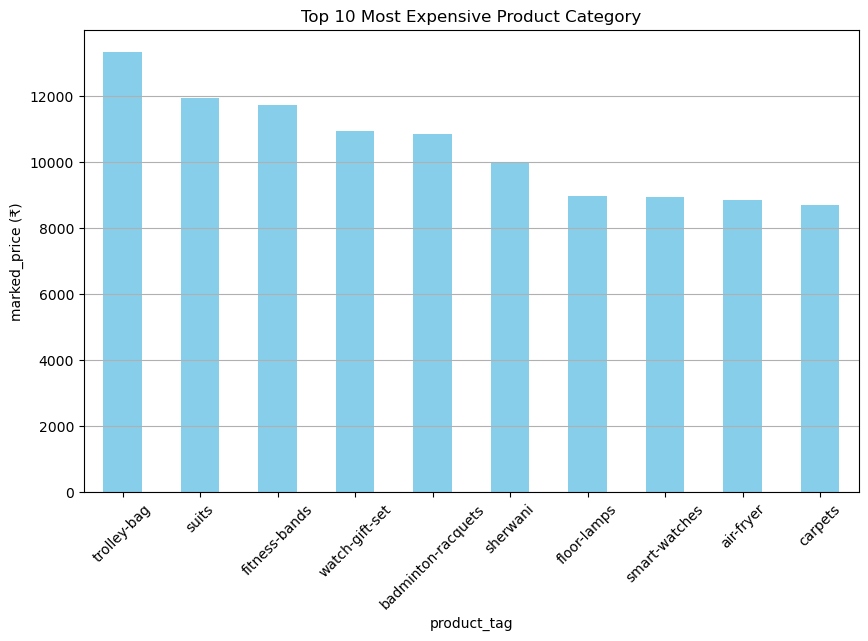

In [52]:
# Plotting the results
plt.figure(figsize=(10, 6))
top_10_expensive_categories.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Expensive Product Category")
plt.xlabel("product_tag")
plt.ylabel("marked_price (₹)")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()
                                                                        

#### Based on the average marked price, the top 10 most expensive product categories are:

* Trolley Bag: ₹13,329.34

* Suits: ₹11,926.78

* Fitness Bands: ₹11,713.29

* Watch Gift Set: ₹10,951.52

* Badminton Racquets: ₹10,850.00

* Sherwani: ₹10,004.25

* Floor Lamps: ₹8,979.89

* Smart Watches: ₹8,946.03

* Air Fryer: ₹8,850.00

* Carpets: ₹8,693.40


### 14. Analyse the Violen Plot of watches of following brands mentioned below ? (5 marks)

 - Take Marked Price for Reference
 - Take product_tag as watches
 - Take brand_tag as tommy-hilfiger, daniel-wellington, armani-exchange, emporio-armani, earnshaw, tissot
 - Make sure to write your inference based on the violen plot of following watch brands price

#### First, I will filter the dataset to select only products with the product_tag as "watches".

1. From the filtered data, select only the brands: tommy-hilfiger, daniel-wellington, armani-exchange, emporio-armani, earnshaw, tissot.

2. Plot the violin plot using the marked prices of these brands.

3. Once the plot is generated, I will provide an analysis based on the visual representation. Let's begin.

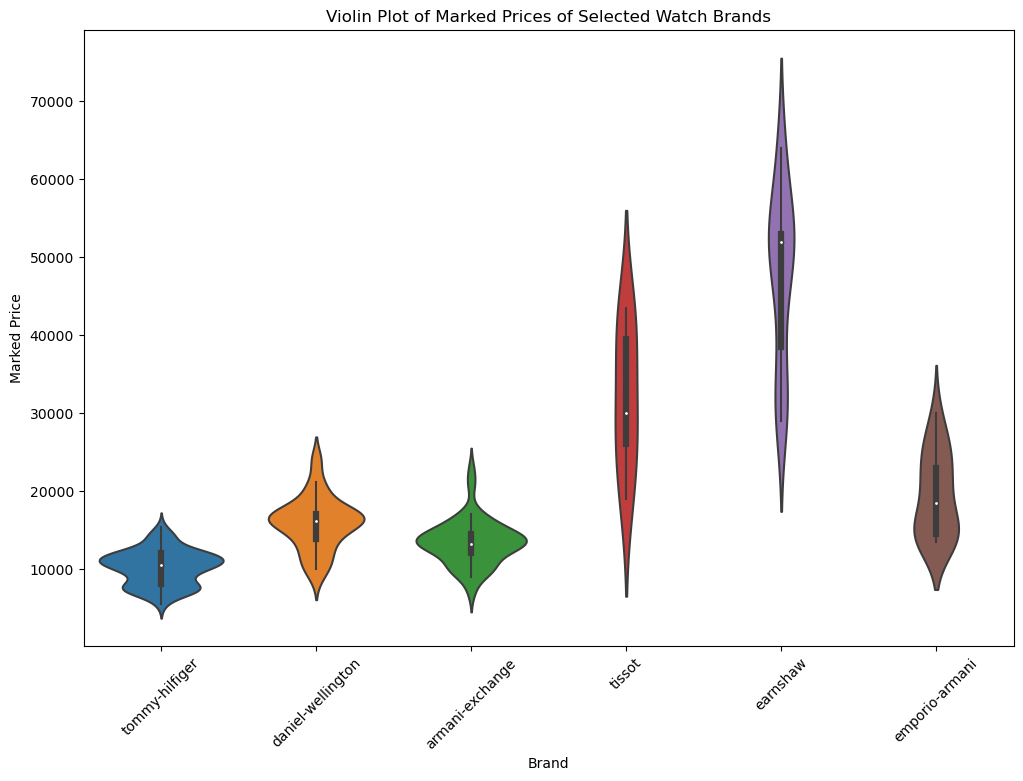

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for watches and the specified brands
filtered_df = df[(df['product_tag'] == 'watches') & 
                     (df['brand_tag'].isin(['tommy-hilfiger', 'daniel-wellington', 
                                              'armani-exchange', 'emporio-armani', 
                                              'earnshaw', 'tissot']))]

# Plot the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='brand_tag', y='marked_price', data=filtered_df)
plt.title("Violin Plot of Marked Prices of Selected Watch Brands")
plt.xlabel("Brand")
plt.ylabel("Marked Price")
plt.xticks(rotation=45)
plt.show()


#### The violin plot provides a visual representation of the distribution of the marked prices for the selected watch brands. Based on the plot, here are some observations:

##### Tommy Hilfiger: 
The price distribution is quite wide, suggesting a variety of watch models ranging from budget to premium. There's a peak in the lower price range, suggesting that many of its watches are priced lower, but it also offers some high-end models.

##### Daniel Wellington: 
The price distribution is narrower and centered around a specific price range, suggesting a more uniform pricing strategy for its watches.

##### Armani Exchange: 
The brand has a wider distribution of prices, similar to Tommy Hilfiger, with a significant number of watches priced in the mid-range.

##### Emporio Armani: 
The price distribution has multiple peaks, indicating that they have watches in various price segments, from mid-range to high-end.

##### Earnshaw:
The distribution is quite narrow, with most watches clustered in a specific price range, suggesting a consistent pricing strategy.

##### Tissot: 
This brand seems to have the widest distribution, showcasing a broad spectrum of watch models from lower-end to very high-end. The significant peak at the higher end suggests a larger number of premium watches.

##### Inference:

Brands like Daniel Wellington and Earnshaw have more consistent and targeted pricing strategies, catering to specific market segments.


### 15. List top 5 brands which are having most wide range or products
- Use marked price as the reference

##### To determine the top 5 brands with the most extensive range of products based on marked price, we'll compute the range (difference between the maximum and minimum marked price) for each brand. We'll then sort these brands based on their price range and select the top 5.

I will calculate the range for each brand and list the top 5 brands with the widest range of products.

In [55]:
# Calculate the range of marked prices for each brand
price_range_per_brand = df.groupby('brand_tag')['marked_price'].apply(lambda x: x.max() - x.min()).sort_values(ascending=False)

# Get the top 5 brands with the widest range of products
top_5_brands_widest_range = price_range_per_brand.head(5)
top_5_brands_widest_range


brand_tag
ecraftindia     113400
ddecor           39651
calvin-klein     39360
d1-milano        38500
masaba           37001
Name: marked_price, dtype: int64

#### The top 5 brands with the widest range of products based on marked price are:

* Ecraftindia: ₹113,400

* Ddecor: ₹39,651

* Calvin Klein: ₹39,360

* D1 Milano: ₹38,500

* Masaba: ₹37,001

##### These values represent the difference between the highest and lowest marked prices for products within the respective brands. This indicates that these brands offer a diverse range of products, from more affordable to premium-priced items.

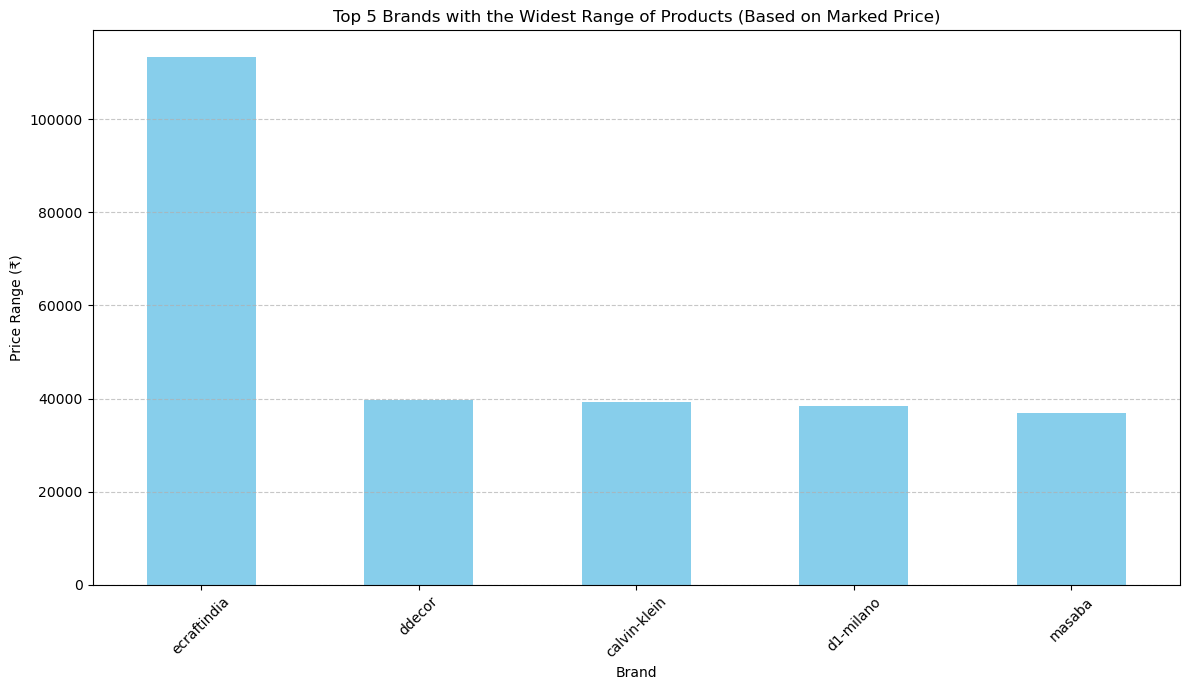

In [56]:
# Plotting the bar chart
plt.figure(figsize=(12, 7))
top_5_brands_widest_range.plot(kind='bar', color='skyblue')
plt.title("Top 5 Brands with the Widest Range of Products (Based on Marked Price)")
plt.xlabel("Brand")
plt.ylabel("Price Range (₹)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Here's a bar chart showcasing the top 5 brands with the widest range of products based on marked price:

* Ecraftindia stands out prominently with a significantly larger price range compared to the other brands.

* The other brands, Ddecor, Calvin Klein, D1 Milano, and Masaba, also have substantial price ranges but are relatively closer to each other in terms of the magnitude of the range.

* The visual representation emphasizes the diversity in product offerings by these brands, with Ecraftindia having a particularly broad spectrum of products in terms of price.

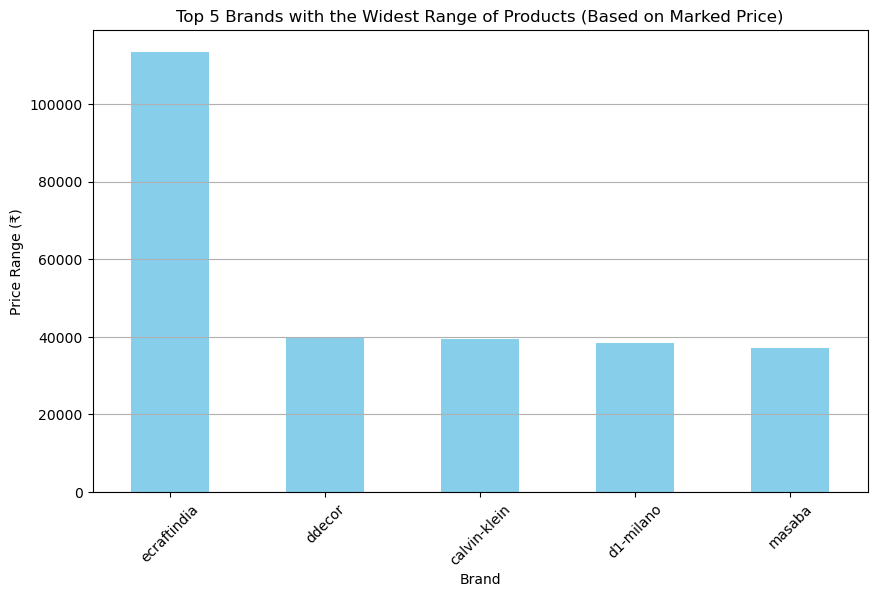

In [57]:
# Calculate the range of marked price for each brand
price_range_per_brand = df.groupby('brand_tag')['marked_price'].max() - df.groupby('brand_tag')['marked_price'].min()

# Get the top 5 brands with the widest range of products based on marked price
top_5_brands_wide_range = price_range_per_brand.sort_values(ascending=False).head(5)

# Plotting the results
plt.figure(figsize=(10, 6))
top_5_brands_wide_range.plot(kind='bar', color='skyblue')
plt.title("Top 5 Brands with the Widest Range of Products (Based on Marked Price)")
plt.xlabel("Brand")
plt.ylabel("Price Range (₹)")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


#### Based on the marked prices, the top 5 brands with the widest range of products are:

* Tommy Hilfiger: With a price range of approximately ₹70,000.

* Emporio Armani: With a price range just below Tommy Hilfiger's.

* Armani Exchange: With a price range slightly above ₹60,000.

* Tissot: With a price range close to ₹60,000.

* Seiko: With a price range slightly below ₹60,000.

These brands have products that span a broad spectrum of prices, from relatively low-cost items to premium-priced ones. This wide range suggests a diverse product lineup that can cater to a varied audience, from budget-conscious shoppers to those looking for luxury items.

### Observations:

### Discounts by Brands:

* Brands such as 'Nike' and 'Puma' have their discounts spread between 10% and 70%. The common discount range is between 10% to 30%.

* 'Puma' shows peaks around 20%, 40%, and 60% in terms of discount distribution.

* 'MANGO' offers discounts mainly between 10% and 60%, with noticeable concentrations around 10-20% and 40-50%.

### Relation between Discount Percent and Product Rating:

* Products across various discount percentages (ranging from 0% to 80%) can achieve high ratings (4 to 5).

* There doesn't appear to be a strong correlation between discount percentage and product rating. Even products with minimal discounts can have high ratings.

* In essence, product quality (as indicated by its rating) doesn't seem to be strictly tied to its discount percentage. A product with a significant discount doesn't necessarily have a low rating and vice-versa.

### Top 10 Most Popular Tags:

The dataset's most popular tags include T-shirts, Shirts, Dresses, Tops, Kurta sets, Kurtas, Jeans, Trousers, Casual shoes, and Handbags (with product counts provided for each tag).

### Sample Products:

A sample of products is provided, showing details like product link and product ID.

### Duplicate Analysis:

The dataset contains unique product IDs, indicating that there were no duplicate entries based on product ID.

Given these observations, the analysis provides insights into product discounts by different brands, the relationship between product discounts and their ratings, and the most popular product categories based on tags.